
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




znacka,id,emise_pred,emise_po,problem,zlepseni,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>
W,505,153.80,121.18,FALSE,32.62,TRUE,FALSE
X,16,143.85,70.00,TRUE,73.85,TRUE,TRUE
Y,256,161.06,160.02,TRUE,1.04,TRUE,FALSE


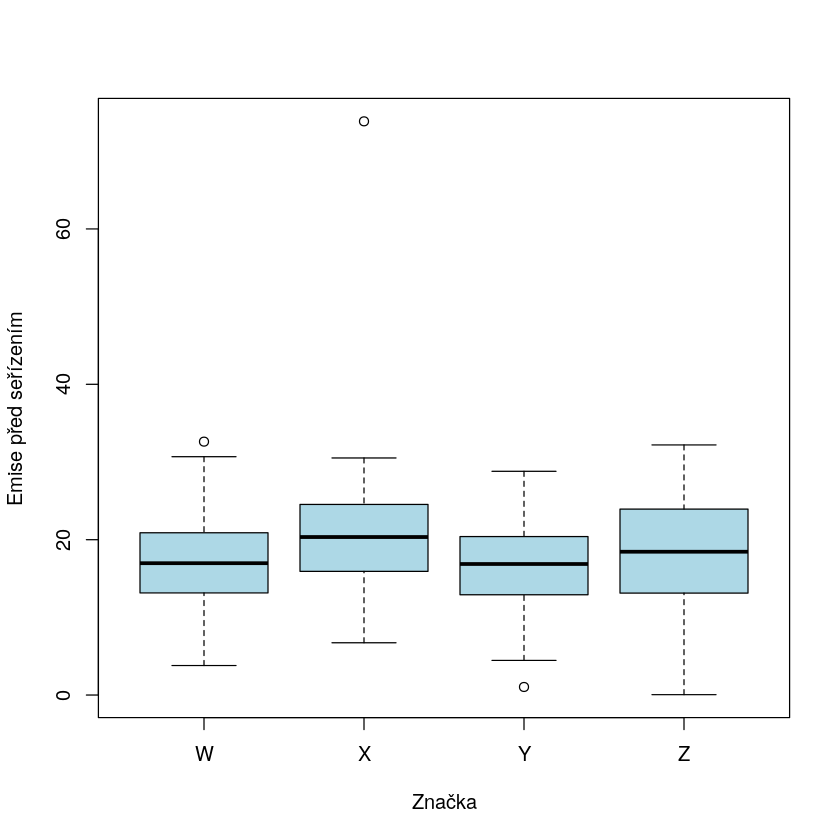

znacka,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
W,16.91184,16.9500,3.80,30.680,5.288362,0.74296211,0.9073284
X,19.78595,20.2000,6.73,30.520,5.725816,0.02245072,0.2538542
Y,16.64614,16.8800,4.46,28.800,4.942277,0.87607266,0.4601031
Z,17.82088,18.4515,0.05,32.197,7.010821,0.01605076,0.1740211



	Bartlett test of homogeneity of variances

data:  zlepseni by znacka
Bartlett's K-squared = 20.774, df = 3, p-value = 0.0001173



	Kruskal-Wallis rank sum test

data:  zlepseni by znacka
Kruskal-Wallis chi-squared = 26.579, df = 3, p-value = 7.212e-06


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 26.5794, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          W          X          Y
---------+---------------------------------
       X |  -4.242360
         |    0.0001*
         |
       Y |   0.411985   4.640436
         |     1.0000    0.0000*
         |
       Z |  -1.485531   2.739728  -1.891051
         |     0.8244    0.0369*     0.3517

alpha = 0.05
Reject Ho if p <= alpha


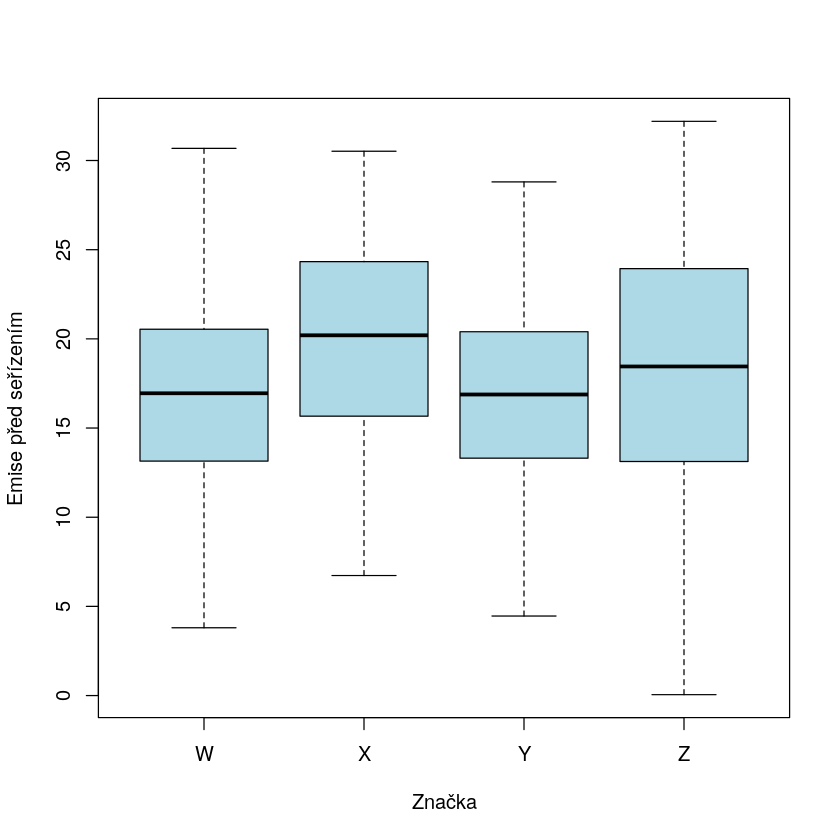

In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(rstatix)
library(tidyr)

# Load the data
data <- read_excel("data_20240522_A.xlsx")


# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$emise_pred - data$emise_po)

boxplot(data$zlepseni ~ data$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

outliers <- data %>%
    group_by(znacka) %>%
    rstatix::identify_outliers(zlepseni)

outliers

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)
boxplot(data$zlepseni ~ data$znacka, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(znacka) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ znacka, data = data)
kruskal.test(zlepseni ~ znacka, data = data)
dunn.test::dunn.test(data$zlepseni, data$znacka, method = "bonferroni", altp = TRUE)

data <- data


In [2]:
t.test(data$zlepseni[data$znacka == "X"], alternative = "greater", mu = 0, conf.level = 0.95)


	One Sample t-test

data:  data$zlepseni[data$znacka == "X"]
t = 42.039, df = 147, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 19.00687      Inf
sample estimates:
mean of x 
 19.78595 


In [3]:
var.test(data$zlepseni[data$znacka == "X"], data$zlepseni[data$znacka == "Y"],ratio = 1)


	F test to compare two variances

data:  data$zlepseni[data$znacka == "X"] and data$zlepseni[data$znacka == "Y"]
F = 1.3422, num df = 147, denom df = 144, p-value = 0.07718
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.968287 1.859499
sample estimates:
ratio of variances 
          1.342211 


In [4]:
t.test(data$zlepseni[data$znacka == "X"], data$zlepseni[data$znacka == "Y"], alternative = "two.sided", conf.level = 0.95)
13.48434 - 10.98947


	Welch Two Sample t-test

data:  data$zlepseni[data$znacka == "X"] and data$zlepseni[data$znacka == "Y"]
t = 5.0279, df = 286.47, p-value = 8.757e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.910656 4.368960
sample estimates:
mean of x mean of y 
 19.78595  16.64614 


[1] 2.49487

In [9]:
autox_horsi = data %>%
    filter(znacka == "X") %>%
    select(zlepseni)
t.test(autox_horsi)


	One Sample t-test

data:  autox_horsi
t = 42.039, df = 147, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 18.85581 20.71608
sample estimates:
mean of x 
 19.78595 


In [6]:
autox_horsi = data$zlepseni[data$znacka == "X"] < 10
autox_horsi

[1] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[121]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE

In [ ]:
table(autox_horsi)
auto_x_zavada = data$problem[data$znacka == "X"]
table(auto_x_zavada)
tab = table(auto_x_zavada, autox_horsi)
tab = tab[c(2, 1), c(2, 1)]
tab

Warning message in stats::chisq.test(x, y, correct = correct, ...):
“Chi-squared approximation may be incorrect”


[1] 0.302287

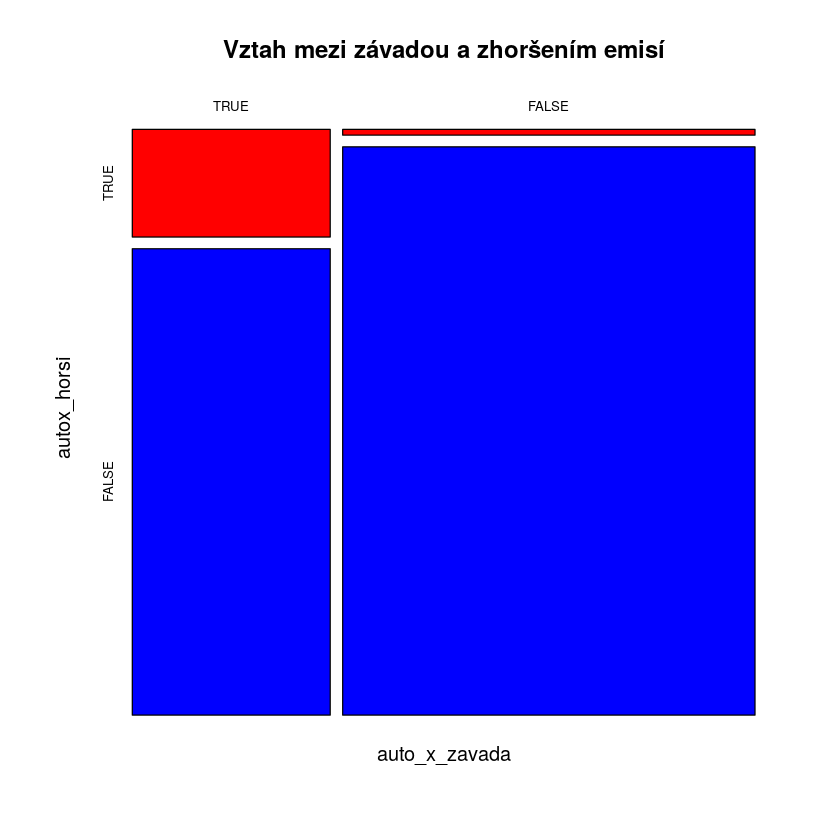

In [6]:
mosaicplot(tab, color = c("red", "blue"), main = "Vztah mezi závadou a zhoršením emisí")
cramer_v(tab)

In [7]:
epiR::epi.2by2(tab)

             Outcome +    Outcome -      Total                 Inc risk *
Exposed +            9           39         48      18.75 (8.95 to 32.63)
Exposed -            1           99        100        1.00 (0.03 to 5.45)
Total               10          138        148       6.76 (3.29 to 12.07)

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 18.75 (2.45, 143.78)
Inc odds ratio                                 22.85 (2.80, 186.37)
Attrib risk in the exposed *                   17.75 (6.54, 28.96)
Attrib fraction in the exposed (%)            94.67 (59.10, 99.30)
Attrib risk in the population *                5.76 (1.27, 10.25)
Attrib fraction in the population (%)         85.20 (6.43, 97.66)
-------------------------------------------------------------------
Yates corrected chi2 test that OR = 1: chi2(1) = 13.524 Pr>chi2 = <0.001
Fisher exact test that OR = 1: Pr>chi2 = <0.001
 Wald confidenc